In [1]:
import os
from tqdm import tqdm  # for status bar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imutils    #  for contours grabbing

In [2]:
# Check dataset directories  
path="C:/Users/User/Desktop/tomi/AI-umjetna inteligencija/Zavrsni projekt_korisne stvari/skripte/projekt_zadnje_radnje/klasifikac_tumor/Dataset_klasifikacija/Brain-MRI/"
print(os.listdir(path))
print(os.listdir(path+'Testing/'))
print(os.listdir(path+'Training/'))

['Testing', 'Training']
['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [3]:
# check number of images in every class

print('Number of glioma tumor images: ',len(os.listdir(path+'Training/glioma_tumor/')))
print('Number of meningioma tumor images: ',len(os.listdir(path+'Training/meningioma_tumor/')))
print('Number of no tumor images: ',len(os.listdir(path+'Training/no_tumor/')))
print('Number of pituitary tumor images: ',len(os.listdir(path+'Training/pituitary_tumor/')))

Number of glioma tumor images:  926
Number of meningioma tumor images:  937
Number of no tumor images:  501
Number of pituitary tumor images:  901


In [ ]:
# create directory for training data to save cropped images

path2="C:/Users/User/Desktop/tomi/AI-umjetna inteligencija/Zavrsni projekt_korisne stvari/skripte/projekt_zadnje_radnje/klasifikac_tumor/Dataset_klasifikacija/Crop-Brain-MRI/"
os.mkdir(path2)
os.mkdir(path2+'glioma_tumor')
os.mkdir(path2+'meningioma_tumor')
os.mkdir(path2+'no_tumor')
os.mkdir(path2+'pituitary_tumor')

In [ ]:
# create directory for testing data
path3="C:/Users/User/Desktop/tomi/AI-umjetna inteligencija/Zavrsni projekt_korisne stvari/skripte/projekt_zadnje_radnje/klasifikac_tumor/Dataset_klasifikacija/Test-Data/"
os.mkdir(path3)
os.mkdir(path3+'glioma_tumor')
os.mkdir(path3+'meningioma_tumor')
os.mkdir(path3+'no_tumor')
os.mkdir(path3+'pituitary_tumor')

In [6]:
# function to crop images


def crop_image(image, plot=False):   # if you want to plot then plot=True
    
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # convert to grayscale
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0) # blurs image, softens sharp edges
    
    img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1] # if pixel value is < 45 then it gets value 0, if >45 then it gets 255
    img_thresh = cv2.erode(img_thresh, None, iterations=2) # the thickness or size of the object decreases or simply the white region decreases in the image(removes farthest layer of pixels)
    img_thresh = cv2.dilate(img_thresh, None, iterations=2) # It increases the white region in the image or the size of the foreground object increases 

    contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # takes a copy of image and retrieving only external boudries of contours and not all,CHAIN_APP gives only the endpoints of contours
    contours = imutils.grab_contours(contours)  # grab all contours from above line
    c = max(contours, key=cv2.contourArea)  # find biggest contour in contour area

    extLeft = tuple(c[c[:, :, 0].argmin()][0])   #  contour positions
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    img_cnt = cv2.drawContours(image.copy(), [c], -1, (0, 255, 255), 4)


    img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)  # colored dots for extreme points
    img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
    img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
    img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure(figsize=(15,6))
        plt.subplot(141)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(142)
        plt.imshow(img_cnt)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Find the biggest contour')
        plt.subplot(143)
        plt.imshow(img_pnt)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Find the extreme points')
        plt.subplot(144)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.grid(False)
        plt.show()
    
    return new_image


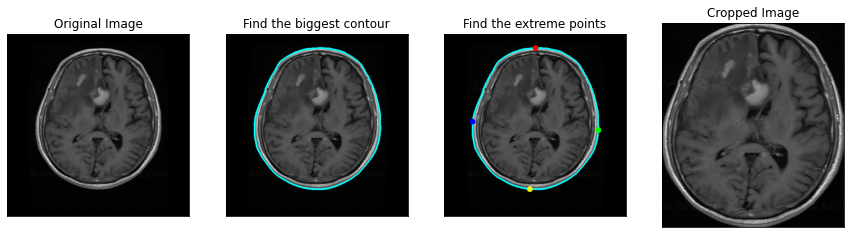

In [9]:
# visualize cropping process

example_image=cv2.imread(path+"Training/glioma_tumor/gg (3).jpg")
cropped_image=crop_image(example_image,plot=True)

In [ ]:
# crop the training images and save it to the directory we previously cretaed

glioma=train_dir+ 'glioma_tumor'
meningioma=train_dir+'meningioma_tumor'
no_tumor=train_dir+'no_tumor'
pituitary=train_dir+'pituitary_tumor'

j=0
for i in tqdm(os.listdir(glioma)):
  path=os.path.join(glioma,i)
  img=cv2.imread(path)
  img=crop_image(img,plot=False)
  if img is not None:                   # if image is successfully read and cropped, resize it and save
    img=cv2.resize(img,(224,224))
    save_path=path2+'glioma_tumor/'+ str(j) + '.jpg'  # names of images are 1.jpg, 2.jpg,...
    cv2.imwrite(save_path,img)
    j=j+1

j=0
for i in tqdm(os.listdir(meningioma)):
  path=os.path.join(meningioma,i)
  img=cv2.imread(path)
  img=crop_image(img,plot=False)
  if img is not None:
    img=cv2.resize(img,(224,224))
    save_path=path2+'meningioma_tumor/'+ str(j) + '.jpg'
    cv2.imwrite(save_path,img)
    j=j+1

j=0
for i in tqdm(os.listdir(no_tumor)):
  path=os.path.join(no_tumor,i)
  img=cv2.imread(path)
  img=crop_image(img,plot=False)
  if img is not None:
    img=cv2.resize(img,(224,224))
    save_path=path2+'no_tumor/'+ str(j) + '.jpg'
    cv2.imwrite(save_path,img)
    j=j+1

j=0
for i in tqdm(os.listdir(pituitary)):
  path=os.path.join(pituitary,i)
  img=cv2.imread(path)
  img=crop_image(img,plot=False)
  if img is not None:
    img=cv2.resize(img,(224,224))
    save_path=path2+'pituitary_tumor/'+ str(j) + '.jpg'
    cv2.imwrite(save_path,img)
    j=j+1

In [ ]:
# crop the testing images and save it to the directory we previously cretaed

test_glioma=test_dir+ 'glioma_tumor'
test_meningioma=test_dir+'meningioma_tumor'
test_no_tumor=test_dir+'no_tumor'
test_pituitary=test_dir+'pituitary_tumor'

j=0
for i in tqdm(os.listdir(test_glioma)):
  path=os.path.join(test_glioma,i)
  img=cv2.imread(path)
  img=crop_image(img,plot=False)
  if img is not None:
    img=cv2.resize(img,(224,224))
    save_path=path3+'glioma_tumor/'+ str(j) + '.jpg'
    cv2.imwrite(save_path,img)
    j=j+1

j=0
for i in tqdm(os.listdir(test_meningioma)):
  path=os.path.join(test_meningioma,i)
  img=cv2.imread(path)
  img=crop_image(img,plot=False)
  if img is not None:
    img=cv2.resize(img,(224,224))
    save_path=path3+'meningioma_tumor/'+ str(j) + '.jpg'
    cv2.imwrite(save_path,img)
    j=j+1

j=0
for i in tqdm(os.listdir(test_no_tumor)):
  path=os.path.join(test_no_tumor,i)
  img=cv2.imread(path)
  img=crop_image(img,plot=False)
  if img is not None:
    img=cv2.resize(img,(224,224))
    save_path=path3+'no_tumor/'+ str(j) + '.jpg'
    cv2.imwrite(save_path,img)
    j=j+1

j=0
for i in tqdm(os.listdir(test_pituitary)):
  path=os.path.join(test_pituitary,i)
  img=cv2.imread(path)
  img=crop_image(img,plot=False)
  if img is not None:
    img=cv2.resize(img,(224,224))
    save_path=path3+'pituitary_tumor/'+ str(j) + '.jpg'
    cv2.imwrite(save_path,img)
    j=j+1